In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("../data/TSLA_data.csv")
df.head()

,timestamp,direction,Support,Resistance,open,high,low,close,volume
0,2022-08-25,SHORT,"[840, 880]","[900, 895, 940]",302.542,302.807,291.556,295.897,6685.7261
1,2022-08-26,SHORT,"[877, 880, 840, 835, 845]","[900, 908, 980.5, 940]",297.297,301.956,287.376,288.017,508.5590
2,2022-08-27,SHORT,[290],"[300, 322, 323, 324, 422]",297.297,301.956,287.376,288.017,508.5590
3,2022-08-28,LONG,"[285, 286, 84]","[290, 292, 295]",297.297,301.956,287.376,288.017,508.5590
4,2022-08-31,SHORT,"[280, 247, 150, 185]","[287, 288, 292]",280.497,280.837,271.776,275.337,94.2867


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   665 non-null    object 
 1   direction   335 non-null    object 
 2   Support     665 non-null    object 
 3   Resistance  665 non-null    object 
 4   open        665 non-null    float64
 5   high        665 non-null    float64
 6   low         665 non-null    float64
 7   close       665 non-null    float64
 8   volume      665 non-null    float64
dtypes: float64(5), object(4)
memory usage: 46.9+ KB


In [4]:
# Safely convert string to list
def safe_list(val):
    try:
        parsed = ast.literal_eval(val)
        if isinstance(parsed, list) and parsed:
            return parsed
        else:
            return [float('nan')]  # placeholder for empty/malformed lists
    except Exception:
        return [float('nan')]

In [5]:
# Preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Support'] = df['Support'].apply(safe_list)
df['Resistance'] = df['Resistance'].apply(safe_list)

In [6]:
# Additional columns
df['bullish'] = df['close'] > df['open']
df['support_min'] = df['Support'].apply(min)
df['support_max'] = df['Support'].apply(max)
df['resistance_min'] = df['Resistance'].apply(min)
df['resistance_max'] = df['Resistance'].apply(max)
df['support_range'] = df['support_max'] - df['support_min']
df['resistance_range'] = df['resistance_max'] - df['resistance_min']

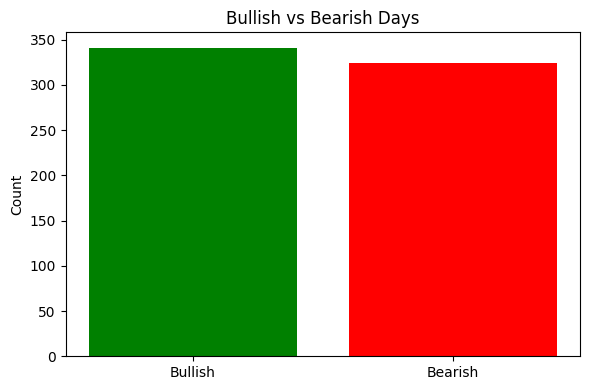

In [7]:
# Bullish vs Bearish Days

bullish_count = df['bullish'].sum()
bearish_count = len(df) - bullish_count

plt.figure(figsize=(6, 4))
plt.bar(['Bullish', 'Bearish'], [bullish_count, bearish_count], color=['green', 'red'])
plt.title("Bullish vs Bearish Days")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\uddit\AppData\Local\Temp\ipykernel_40228\4049135612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='direction', palette={'LONG': 'green', 'SHORT': 'red'})


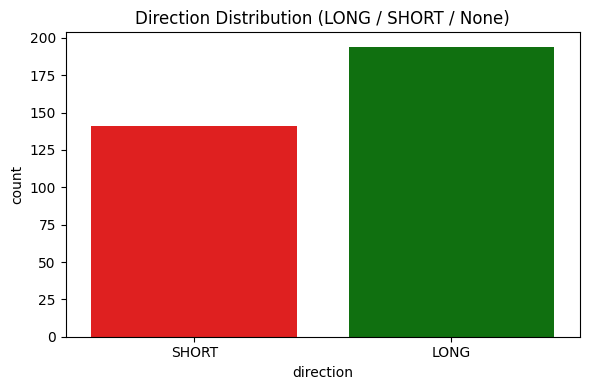

In [8]:
# Direction Distribution

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='direction', palette={'LONG': 'green', 'SHORT': 'red'})
plt.title("Direction Distribution (LONG / SHORT / None)")
plt.tight_layout()
plt.show()

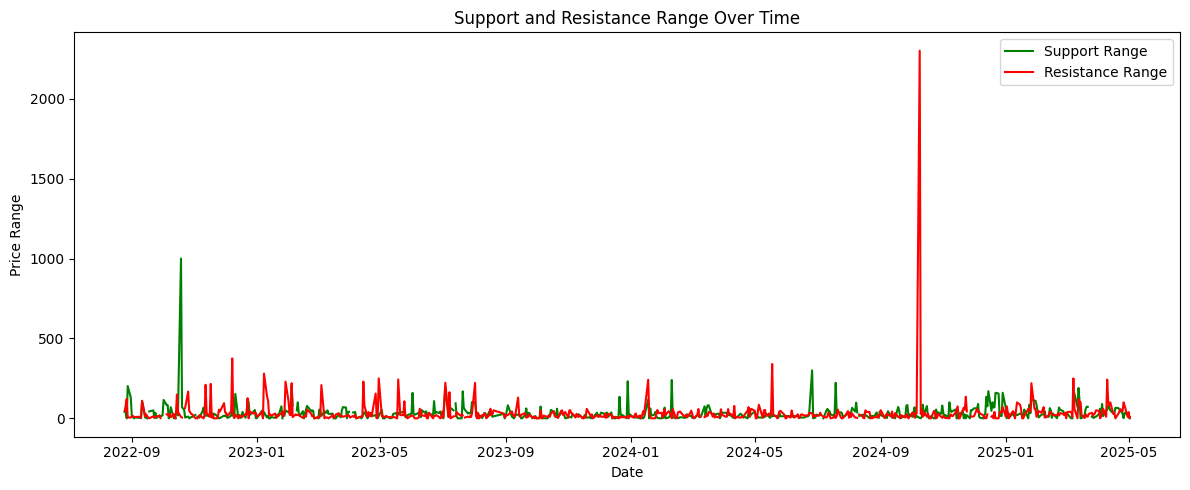

In [9]:
# Support and Resistance Range Over Time

plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['support_range'], label='Support Range', color='green')
plt.plot(df['timestamp'], df['resistance_range'], label='Resistance Range', color='red')
plt.title("Support and Resistance Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
print("Number of Bullish Days:", df['bullish'].sum())
print("Number of Bearish Days:", len(df) - df['bullish'].sum())

print("\nDirection Distribution:")
print(df['direction'].value_counts(dropna=False))

print("\nAverage Support Range:", df['support_range'].mean())
print("Average Resistance Range:", df['resistance_range'].mean())

print("\nMax Volume Date:", df.loc[df['volume'].idxmax(), 'timestamp'].date())
print("Max Close Price:", df['close'].max())
print("Widest Resistance Band Date:", df.loc[df['resistance_range'].idxmax(), 'timestamp'].date())

Number of Bullish Days: 341
Number of Bearish Days: 324

Direction Distribution:
NaN      330
LONG     194
SHORT    141
Name: direction, dtype: int64

Average Support Range: 31.231518404907977
Average Resistance Range: 33.10105504587156

Max Volume Date: 2022-08-25
Max Close Price: 460.396
Widest Resistance Band Date: 2024-10-09
